# Титаник

Посмотрим, какие операции мы можем выполнять с данными в *Pandas*. Мы будем работать с датасетом, в котором содержатся данные о пассажирах затонувшего Титаника.

In [1]:
import pandas as pd

Допустим, вы скачали данные в файл `data/titanic.csv`. Тогда вы можете загрузить их с помощью инструкции

In [2]:
df = pd.read_csv('data/titanic.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Группировка данных в *Pandas*

Давайте сначала посмотрим, какой процент пассажиров выжил. Мы обращаемся к столбцу *Survived* датафрейма, который мы создали, прочитав *CSV*-таблицу. Затем применяем к нему метод `mean`

In [4]:
df['Survived'].mean()

0.3838383838383838

А как нам посчитать процент выживших в зависимости от какого-либо признака? Для этого существует метод `groupby`, который позволяет сгруппировать данные с одинаковыми значениями заданного набора полей.

Например, если мы хотим найти процент выживших среди мужчин и женщин, мы будем использовать следующую команду:

In [5]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Можно группировать данные и по нескольким полям сразу. Например, так мы можем узнать проценты выживших в разрезе пола и класса обслуживания:

In [6]:
df.groupby(['Sex', 'Class'])['Survived'].mean()

Sex     Class
female  1.0      0.968421
        2.0      0.920000
        3.0      0.496503
male    1.0      0.368852
        2.0      0.158879
        3.0      0.135447
Name: Survived, dtype: float64

Уже на этом этапе мы можем увидеть определенные закономерности: почти все женщины из кают первого и второго класса выжили, тогда как большинство мужчин и пассажиров третьего класса (включая женщин) погибло.

Метод `groupby` возвращает *DataFrame*-подобный объект, поэтому мы можем обращаться к нужным столбцам, а для них [считать различные характеристики и производить с ними арифметические операции](https://pandas.pydata.org/pandas-docs/stable/reference/series.html).

Например, так мы можем найти медианный возраст всех пассажиров в разрезе пола и класса:

In [7]:
df.groupby(['Sex', 'Class'])['Age'].median()

Sex     Class
female  1.0      36.0
        2.0      28.0
        3.0      22.0
male    1.0      41.5
        2.0      30.0
        3.0      25.0
Name: Age, dtype: float64

Статистические функции типа `mean` и `median` возвращают нам объект *Series*. Для того, чтобы получить конкретное значение из этого объекта, нужно указать набор ключей. Например, если мы хотим узнать 90-ю перцентиль возраста выживших пассажиров второго класса, мы можем написать такой код:

In [8]:
obj = df.groupby(['Class', 'Survived'])["Age"].quantile(0.9)
obj[2.0, 1.0] # здесь 2.0 - класс, а 1.0 - признак того, что пассажир выжил

44.70000000000002

Полученный результат означает, что 90% пассажиров второго класса, возраст которых меньше либо равен 44.7 выжили.

## Фильтрация данных в *Pandas*

Чтобы отбросить лишние элементы, достаточно проиндексировать исходный массив полученным фильтрующим массивом:

In [9]:
survived = df[df['Survived'] == 1.0]
survived.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0


Здесь выражение `data['Survived'] == 1.0` возвращает булевский массив, в котором на месте элементов, прошедших фильтр, стоит *True*. Далее мы фильтруем нашу исходную таблицу по полученной маске. В следующем примере мы выводим количества выживших мужчин и женщин:

In [10]:
df[df['Survived'] == 1.0]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

Таким же образом мы можем написать и сложное условие для фильтрации:

In [11]:
df[(df['Age'] > 20) & (df['Survived'] > 0)]['Sex'].value_counts()

female    144
male       64
Name: Sex, dtype: int64

> Обратите внимание, что условия нужно писать в скобках.

## Арифметические операции

С помощью Pandas можно применять арифметические операции сразу ко всей таблице, например, [умножить ее целиком на какое-либо число](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mul.html). Такую операцию можно выполнять как с помощью методов, например, mul, так и с помощью обычной оператора умножения:

In [12]:
df.groupby(['Class'])['Survived'].mean().mul(100)

Class
1.0    63.133641
2.0    47.252747
3.0    24.081633
Name: Survived, dtype: float64

In [13]:
df.groupby(['Class'])['Survived'].mean() * 100

Class
1.0    63.133641
2.0    47.252747
3.0    24.081633
Name: Survived, dtype: float64

Обе эти операции выводят долю выживших по классам в процентах.

Таким же образом можно производить операции над столбцами. Следующий код увеличивает возраст всех пассажиров Титаника на 1 год:

In [14]:
df['Age'] += 1

## Выбор столбцов и строк

*Pandas* позволяет фильтровать таблицу по строкам и столбцам. Для этого можно использовать метод `filter`. Он позволяет указать список столбцов/строк в явном виде, применить регулярное выражение или задать поиск по подстроке. Выберем из наших данных колонки с возрастом, классом обслуживания и информацией о том, выжил пассажир или нет:

In [15]:
filtered = df.filter(items=['Age', 'Class', 'Survived'], axis=1)
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1046 non-null   float64
 1   Class     1304 non-null   float64
 2   Survived  891 non-null    float64
dtypes: float64(3)
memory usage: 30.8 KB


В результате мы получим новый *DataFrame* под названием `filtered`, который будет содержать только 3 выбранных нами столбца:

In [16]:
filtered

,Age,Class,Survived
0,23.0,3.0,0.0
1,39.0,1.0,1.0
2,27.0,3.0,1.0
3,36.0,1.0,1.0
4,36.0,3.0,0.0
...,...,...,...
1304,NaN,3.0,NaN
1305,40.0,1.0,NaN
1306,39.5,3.0,NaN
1307,NaN,3.0,NaN


В простых случаях, когда вам нужно просто выбрать столбцы по имени, вы можете использовать обычную индексацию. Например, `df['Age']` вернёт вам столбец с возрастами. После этого можно взять нужную строку: `df['Age'][1]`. Обратите внимание, что в этом случае столбцы и строки “перепутаны” - сначала идёт столбец, а потом строка. Это сделано для удобства обработки данных по столбцам: вспомните инструкцию `data['Age'] += 1` из предыдущего раздела.

*Pandas* позволяет выбрать и несколько столбцов сразу - достаточно указать их список:

In [17]:
df[['Age', 'Survived']]

,Age,Survived
0,23.0,0.0
1,39.0,1.0
2,27.0,1.0
3,36.0,1.0
4,36.0,0.0
...,...,...
1304,NaN,NaN
1305,40.0,NaN
1306,39.5,NaN
1307,NaN,NaN


Другой способ выбрать столбцы и строки - использовать свойство `loc`. В отличие от *Series*, `loc` принимает два аргумента: список строк и список столбцов. Если второй аргумент опустить, то будут выбраны все столбцы.

Столбцы и строки в `loc` можно задавать множеством способов. Можно, например, указать их явно:

- `df.loc[1, 'Age']` вернёт возраст пассажира с индексом 1
- `df.loc[[0, 5], ['Age', 'Survived']]` вернёт датафрейм из пассажиров с индексами 0 и 5 с указанием их возрастов и информации о том, выжили ли они
- `df.loc[50, ['Age', 'Sex']]` вернёт *Series* с возрастом и полом пассажира с индексом 50
- `df.loc[7]` вернёт *Series* со всей информацией про пассажира с индексом 7

Кроме того, если индексы столбцов и/или строк у вас числовые, вы можете перебирать их в стиле обычных *python*-списков. Например:

- `df.loc[5:10]` выберет всех пассажиров с индексами от 5 до 9 включительно
- `df.loc[1300::2]` выберет всех пассажиров с чётными индексами, большими или равными 1300

Мы узнали множество способов выбрать строки и столбцы в таблице, но не упомянули, как взять строку или столбец по индексу. Для этого существует свойство `iloc`. По аналогии с одноимённым свойством в *Series* оно работает так:

- `df.iloc[i]` вернёт строку с индексом *i* в виде объекта *Series*
- `df.iloc[:,i]` вернёт столбец с индексом *i* в виде объекта *Series*
- `df.iloc[::2]` вернёт все строки с чётными индексами

Наконец, можно узнать размеры таблицы, посмотрев на свойство `df.shape`.

In [18]:
df.shape

(1309, 21)

## Статистические показатели

*Pandas* позволяет фильтровать таблицу по строкам и столбцам. Для этого можно использовать метод `filter`. Он позволяет указать список столбцов/строк в явном виде, применить регулярное выражение или задать поиск по подстроке. Выберем из наших данных колонки с возрастом, классом обслуживания и информацией о том, выжил пассажир или нет.

Помимо уже упоминавшихся `mean()`, `median()` и `percentile()`, *Pandas* позволяет, например, считать попарную корреляцию между всеми столбцами. Рассмотрим ее на конкретном примере и применим этот метод к предыдущим данным:

In [19]:
filtered = df.filter(items=['Age', 'Class', 'Survived'], axis=1)
filtered.corr()

,Age,Class,Survived
Age,1.000000,-0.406132,-0.077221
Class,-0.406132,1.000000,-0.341829
Survived,-0.077221,-0.341829,1.000000


Изучив эти данные, мы увидим следующие зависимости. Во-первых, люди старшего возраста могли себе позволить более высокий класс обслуживания (с меньшим номером класса), этот вывод следует из отрицательной корреляции: увеличение возраста ведет к уменьшению номера класса. Во-вторых, люди в более высоком классе обслуживания имели больше шансов выжить.

## Проект

![titanic](data/titanic.png)

Мало найдется людей, которые не слышали про крушение атлантического лайнера **“Титаник”**. Самый большой на тот момент океанский лайнер столкнулся с айсбергом, что привело к гибели самого корабля и большинства находившихся на борту пассажиров: по различным данным, катастрофа унесла жизни от 1495 до 1635 человек из 2208 находившихся на борту. Крушение титаника глубоко отпечаталось в нашей культуре: этому событию посвящено множество литературных произведений (как документальных, так и художественных), десятки фильмов (самым известным из которых, пожалуй, является картина режиссера Джеймса Кэмерона). И даже первое соревнование на Kaggle **“Titanic: Machine Learning from Disaster”** (кстати, датасет мы позаимствовали отсюда) посвящено теме, которую мы избрали для проекта этой недели.

> Пришло время применить полученные навыки программирования на языке *Python* к настоящей задаче машинного обучения!

По итогам этого проекта вы обучите классификатор: модель, которая предсказывает гибель пассажира на борту Титаника и оценивает качество этого предсказания. Да, данные не самые веселые, но очень интересные. Проанализировав их и построив модель, можно прийти ко многим интересным социально-культурным выводам: что в начале 20-го века могло повлиять на то, выживет человек в катастрофе, или нет? Пол, возраст, социальный и экономический класс? Успешно решив проект (а в вас мы не сомневаемся), обязательно подумайте о важности тех или иных факторов.

И да, науки о данных применяются в совершенно разных сферах: не только технических и экономических, но также и в истории, культуре, социологии и многих других. Если вам это покажется интересным, обратите внимание на область исследований [Digital Humanities](https://en.wikipedia.org/wiki/Digital_humanities).

In [20]:
import numpy as np

## Задание 1

- Входные данные: *numpy*-массив `x` размера `(n, 2)` и два числа `p` и `q` (из промежутка `[0, 1]`).
- Результат: напишите функцию `survive_or_not(x, p, q)`, моделирующую процесс выживания на Титанике, т. е., возвращающую *numpy*-массив размера `(n,)`, содержащий нули и единицы (1, если человек выжил, 0 в противном случае).

Для начала давайте попробуем смоделировать процесс выживания на Титанике.

Допустим, что выживание определяется всего двумя факторами: возраст и цена билета. Для определённости, введём следующий алгоритм:

- изначально вероятность выжить равна 0.7
- если возраст > 60, то вероятность умножается на `p` (0 < p < 1)
- если цена < 50, то вероятность умножается на `q` (0 < q <1)

Здесь `p` и `q` - какие-то два числа из промежутка `[0, 1]`, это параметры процесса.
Мы сильно упростили модель, считаем, что на выживаемость влияет только возраст и цена билета. В зависимости от них мы получаем некоторую вероятность, а потом подкидываем монетку. В этом процессе есть `p` и `q` - какие-то числа. Скажем, если мы возьмём `p=0.5`, а `q=0.7`, то у нас будет один процесс, если `p` и `q` изменить, то и процесс будет иным.

Таким образом, у вас есть два входящих сигнала - возраст и цена билета. Исходя из этих сигналов вы формируете вероятность выживания `prob` по приведённым выше правилам. После того, как вы определили эту вероятность, вы подкидываете несимметричную монетку, которая с полученной вероятностью `prob` выпадает орлом, а с вероятностью `(1-prob)` - решкой. Если выпал орёл, вы возвращаете результат **“пассажир выживет”**.

В данной задаче от вас требуется написать функцию `survive_or_not(x, p, q)`, моделирующую этот процесс. Для имитации подбрасывания монетки вы можете использовать `np.random.binomial(1, prob)`, где `prob` - *numpy*-массив с вероятностями выживаемости.

- **Sample Input**: `survive_or_not(np.array([[30, 250], [75, 20]]), 0.5, 0.5)`
- **Sample Output**: `np.array([1, 0])`

In [21]:
def survive_or_not(x: np.array, p: float, q: float) -> np.array:
    age = 0
    price = 1
    prob = np.ones(x.shape[0]) * 0.7
    prob[x[:, age] > 60] *= p
    prob[x[:, price] < 50] *= q
    return np.random.binomial(1, prob)

In [22]:
survive_or_not(np.array([[30, 250], [75, 20]]), 0.5, 0.5)

array([0, 0])

## Задание 2

- Входные данные: *numpy*-массив `predictions` с вероятностями, *numpy*-массив `answers` с ответами на вопрос “Выжил ли пассажир?” (0, если не выжил и 1, если выжил).
- Результат: реализуйте функцию `classification_loss(predictions, answers)`, вычисляющую усреднённую кросс-энтропию между `predictions` и `answers`.

Целью машинного обучения является подбор модели и оптимальных значений параметров этой модели. Обычно разработчик имеет некоторое представление о том, как устроен процесс, который он хочет смоделировать. Однако, нередко бывает и так, что сам процесс понятен, но его параметры неизвестны.

Вернемся к примеру из первой задачи: можно представлять как устроен процесс, но при этом не знать конкретные значения параметров `p` и `q` (в первой задаче проекта эти параметры были нам заданы, а сейчас они от нас скрыты и наша задача - определить их). Оптимальные значения параметров (т. е., такие параметры при которых модель будет максимально соответствовать реальному процессу) обычно определяются следующим образом: выбирается некоторая функция ошибки (иногда переводится как функция потерь) и ставится цель - минимизировать эту ошибку.

Грубо говоря, подбор оптимальных параметров для модели можно сравнить с регулировкой температуры воды в душе, когда подкручивается вентиль горячего и холодного крана до комфортной для кожи температуры.

В этой задаче необходимо реализовать функцию ошибки для задачи бинарной классификации (Cross Entropy Loss) - это когда возможны только два значения (прямо как в нашем случае): пассажир либо выжил, либо нет. Ранее вы предсказали вероятность выживания `prob` (это то число, которое вы вычислили до подбрасывания монетки), а правильный ответ равен `y` (1, если пассажир выжил, 0 в противном случае), то значение функции ошибки будет равно:

`-(log(prob) * y + log(1-prob) * (1-y))`

Данная формула вычисляет кросс-энтропию для одного примера. У нас же их несколько, поэтому нужно просто усреднить эти значения.

Напишите функцию `classification_loss(predictions, answers)`, принимающую предсказания `predictions` и правильные ответы `answers` и возвращающую усреднённую кросс-энтропию. Используйте *numpy* для всех вычислений.

- **Sample input**: `classification_loss(np.array([0.2, 0.2]) , np.array([1, 0]))`
- **Sample output**: 0.916290731874155

In [23]:
def classification_loss(predictions: np.array, answers: np.array) -> float:
    loss = (np.log(predictions) * answers + np.log(1 - predictions) * (1 - answers)) * -1
    return loss.mean()

In [24]:
classification_loss(np.array([0.2, 0.2]) , np.array([1, 0]))

0.916290731874155

## Задание 3

- Входные данные: *numpy*-массив `predictions` (0 или 1), *numpy*-массив answers (0 или 1).
- Результат: реализуйте функцию `accuracy(predictions, answers)`, вычисляющую долю случаев, когда предсказание совпало с тем, что произошло на самом деле.

Когда вы уже построили классификатор, полезно оценить, насколько он хорошо справляется со своей задачей. Некоторое представление об этом даёт функция потерь, но без некоторой подготовки бывает сложно интерпретировать её значение.

Будет гораздо понятнее, если мы посчитаем, например, метрику `accuracy`, т. е., долю случаев, когда наш классификатор предсказал именно то, что произошло на самом деле.

В этом задании вам на вход подаются два *numpy*-массива, оба содержат только числа 0 или 1. Вам нужно посчитать долю случаев, когда элемент в первом массиве равен соответствующему элементу во втором массиве.

- **Sample input**: `accuracy(np.array([1, 0, 1, 1, 0]), np.array([0, 0, 1, 1, 1 ]))`
- **Sample output**: 0.6

In [25]:
def accuracy(predictions: np.array, answers: np.array) -> float:
    correct = (predictions == answers).astype(int)
    return np.mean(correct)

In [26]:
accuracy(np.array([1, 0, 1, 1, 0]), np.array([0, 0, 1, 1, 1 ]))

0.6

## Задание 4

- Входные данные: датафрейм `df` с данными пассажиров Титаника, возраст `age`.
- Результат: реализуйте функцию `survived_ratio(df, age)`, возвращающую долю выживших пассажиров старше данного возраста `age`.

Бытует мнение, что пожилым людям сложней выжить в чрезвычайной ситуации. Доверяй, но проверяй! Проверим это предположение на данных о возрастном составе пассажиров Титаника.

В датафрейме `df` будет множество полей, среди них будут поля `Age` и `Survived`. Вам нужно написать функцию, вычисляющую долю выживших среди пассажиров старше чем данное число `age`.

- **Sample input**: `survived_ratio(df, 40)`
- **Sample output**: 0.36666666666666664

In [27]:
def survived_ratio(df, age: float) -> float:
    return df[df['Age'] > age]['Survived'].mean()

In [28]:
survived_ratio(df, 40)

0.37423312883435583

## Задание 5

- Входные данные: *Series*-объект `row` с данными пассажира.
- Результат: реализуйте функцию `predict(row)`, возвращающую вероятность - выживет пассажир или нет (число от 0 до 1).

И вот мы добрались до самого интересного! Вам предстоит построить полноценный классификатор для пассажиров Титаника. Предсказательные модели - одна из самых интересных задач наук о данных: возьмите изученные инструменты на вооружение и примерьте на себя роль оракула, который дает предсказания: выживет пассажир или погибнет.

На вход вашей функции `predict(row)` будет поступать информация о пассажире. Функция должна вернуть вероятность того, что пассажир выжил (число от 0 до 1). Ваша задача - достичь *accuracy* не менее 75%.

Например, следующий классификатор имеет *accuracy* примерно 0.59:

```py
def predict(row):
    if row['Age'] > 50:
        return 1
    else:
        return 0
```

In [29]:
survived = df[df['Survived'] == 1]

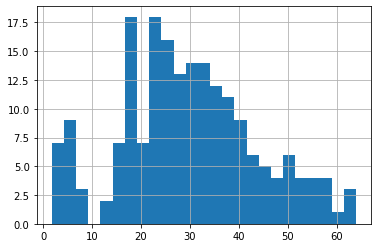

In [30]:
survived[survived['Sex'] == 'female']['Age'].hist(bins=25)

In [31]:
df.filter(items=['Age', 'Class', 'Survived', 'Fare'], axis=1).corr()

,Age,Class,Survived,Fare
Age,1.000000,-0.406132,-0.077221,0.178740
Class,-0.406132,1.000000,-0.341829,-0.552864
Survived,-0.077221,-0.341829,1.000000,0.257307
Fare,0.178740,-0.552864,0.257307,1.000000


In [32]:
def predict(row: pd.Series) -> int:
    if row['Sex'] == 'female':
        return 1
    return 0

accuracy(
    df.apply(predict, axis=1).values,
    df['Survived'].fillna(0).values,
)

0.7387318563789153

In [33]:
def predict(row: pd.Series) -> int:
    if row['Sex'] == 'female' and row['Class'] == 1.0:
        return 1
    return 0

accuracy(
    df.apply(predict, axis=1).values,
    df['Survived'].fillna(0).values,
)

0.7692895339954163

In [34]:
def predict(row: pd.Series) -> int:
    if row['Sex'] == 'female' and row['Class'] == 1.0 and row['Age'] < 53:
        return 1
    if row['Sex'] == 'female' and row['Class'] == 2.0 and row['Age'] < 45:
        return 1
    return 0

accuracy(
    df.apply(predict, axis=1).values,
    df['Survived'].fillna(0).values,
)

0.7868601986249045